# Project Plan

#### Task: 
Collect and analyze weather data across cities worldwide.

#### Purpose: 
PlanMyTrip will use the data to recommend ideal hotels based on clients’ weather preferences.

#### Method: 
Create a Pandas DataFrame with 500 or more of the world’s unique cities and their weather data in real time. This process will entail collecting, analyzing, and visualizing the data.

---

# Collect the Data


#### Use the NumPy module to generate more than 1,500 random latitudes and longitudes.


In [3]:
# Import Dependencies:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) # packs each lat/lng pair into a tuple based on shared index
lat_lngs 

In [5]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

#### Use the citipy module to list the nearest city to the latitudes and longitudes.


In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

587

#### Use the OpenWeatherMap API to request the current weather data from each unique city in your list.


In [8]:
# import the requests library
import requests

# import the API key from the config file
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# for farenheit, use units=imperial
# for celsius, use units=metric
# no units described will output in Kelvin

# this output link will result in an error because we have not defined the city

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=de50e0a22fe7288323c5c95b38f21b89


In [10]:
# Create an endpoint URL for a city.

city_url = url + "&q=" + "Boston"
print(city_url)

# to make this readable, add JSONView Chrome extension

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=de50e0a22fe7288323c5c95b38f21b89&q=Boston


#### Parse the JSON data from the API request.


In [11]:
# JSON = JavaScript Object Notation

# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

# Request methods:
# get(): retreives data from a web source
# head(): displays header info of data
# post(): Adds or annotates data on a web source. Used on mailing groups, message boards, or comments.
# put(): Updates an existing resource. For example, if the date on a Wikipedia page is wrong, you can use the put() method to update that date.
# delete(): deletes data from a web source
# options(): Discovers what HTTP methods a web source allows.
# patch(): partially modifies a data source

<Response [200]>

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02d"}],"base":"stations","main":{"temp":63.66,"feels_like":59.22,"temp_min":60.01,"temp_max":66.99,"pressure":1032,"humidity":77},"visibility":16093,"wind":{"speed":11.41,"deg":80},"clouds":{"all":20},"dt":1592231241,"sys":{"type":1,"id":3486,"country":"US","sunrise":1592212013,"sunset":1592266974},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the text of the 'get' request in JSON format
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02d'}],
 'base': 'stations',
 'main': {'temp': 63.66,
  'feels_like': 59.22,
  'temp_min': 60.01,
  'temp_max': 66.99,
  'pressure': 1032,
  'humidity': 77},
 'visibility': 16093,
 'wind': {'speed': 11.41, 'deg': 80},
 'clouds': {'all': 20},
 'dt': 1592231241,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1592212013,
  'sunset': 1592266974},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


#### Collect the following data from the JSON file and add it to a DataFrame:
    - City, country, and date
    - Latitude and longitude
    - Maximum temperature
    - Humidity
    - Cloudiness
    - Wind speed

##### Example: use Boston as a sample - can delete this later

In [16]:
# Get the JSON data.
boston_data = city_weather.json()
boston_data["dt"]
boston_data["coord"]["lat"]

42.36

In [17]:
# get lat, long, max temp, humidity, cloudiness, and wind speed:

lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 66.99 77 20 11.41


In [18]:
# get date -- need to use datetime

# Import the datetime module from the datetime library.
from datetime import datetime

# Get the date from the JSON file.
date = boston_data["dt"]

# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)


datetime.datetime(2020, 6, 15, 14, 27, 21)

In [19]:
# format properly:

datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

# end sample

'2020-06-15 14:27:21'

In [20]:
# now, get the information for all the cities into a dataframe

# Import the datetime module from the datetime library.
from datetime import datetime

In [21]:
# get a list that processes every name for validity (use try-except block)

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dubuque
Processing Record 2 of Set 1 | codrington
Processing Record 3 of Set 1 | tecoanapa
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | takoradi
Processing Record 6 of Set 1 | dicabisagan
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | bridgeport
Processing Record 9 of Set 1 | kavieng
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | chokurdakh
Processing Record 17 of Set 1 | manoel urbano
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | nanortalik
Processing Record 21 of Set 1 | guerrero negro
Proc

Processing Record 36 of Set 4 | tambacounda
Processing Record 37 of Set 4 | yanan
City not found. Skipping...
Processing Record 38 of Set 4 | eskasem
City not found. Skipping...
Processing Record 39 of Set 4 | amderma
City not found. Skipping...
Processing Record 40 of Set 4 | saleaula
City not found. Skipping...
Processing Record 41 of Set 4 | barrow
Processing Record 42 of Set 4 | chicama
Processing Record 43 of Set 4 | foumbot
Processing Record 44 of Set 4 | worthington
Processing Record 45 of Set 4 | grand-santi
Processing Record 46 of Set 4 | volsk
Processing Record 47 of Set 4 | luderitz
Processing Record 48 of Set 4 | saint-philippe
Processing Record 49 of Set 4 | union
Processing Record 50 of Set 4 | alugan
Processing Record 1 of Set 5 | mahibadhoo
Processing Record 2 of Set 5 | cabo san lucas
Processing Record 3 of Set 5 | port hedland
Processing Record 4 of Set 5 | mago
Processing Record 5 of Set 5 | burlington
Processing Record 6 of Set 5 | kamenskoye
City not found. Skippin

Processing Record 25 of Set 8 | aklavik
Processing Record 26 of Set 8 | alibag
Processing Record 27 of Set 8 | wenling
Processing Record 28 of Set 8 | moosburg
Processing Record 29 of Set 8 | avera
Processing Record 30 of Set 8 | namibe
Processing Record 31 of Set 8 | severo-kurilsk
Processing Record 32 of Set 8 | ciudad guayana
Processing Record 33 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 34 of Set 8 | teonthar
Processing Record 35 of Set 8 | malartic
Processing Record 36 of Set 8 | kirakira
Processing Record 37 of Set 8 | laela
Processing Record 38 of Set 8 | gweta
Processing Record 39 of Set 8 | samarai
Processing Record 40 of Set 8 | ugoofaaru
Processing Record 41 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 42 of Set 8 | galiakot
Processing Record 43 of Set 8 | isangel
Processing Record 44 of Set 8 | whitehorse
Processing Record 45 of Set 8 | beyneu
Processing Record 46 of Set 8 | bouake
Processing Record 47 of Set 8 | marawi


Processing Record 12 of Set 12 | liverpool
Processing Record 13 of Set 12 | the valley
Processing Record 14 of Set 12 | hluti
Processing Record 15 of Set 12 | fuling
Processing Record 16 of Set 12 | champoton
Processing Record 17 of Set 12 | diffa
Processing Record 18 of Set 12 | olga
Processing Record 19 of Set 12 | aguas vermelhas
Processing Record 20 of Set 12 | vangaindrano
Processing Record 21 of Set 12 | zherdevka
Processing Record 22 of Set 12 | mitsamiouli
Processing Record 23 of Set 12 | amatan
Processing Record 24 of Set 12 | panzhihua
Processing Record 25 of Set 12 | rock sound
Processing Record 26 of Set 12 | lodeynoye pole
Processing Record 27 of Set 12 | huilong
Processing Record 28 of Set 12 | ambilobe
Processing Record 29 of Set 12 | trinidad
Processing Record 30 of Set 12 | nuuk
Processing Record 31 of Set 12 | west bay
Processing Record 32 of Set 12 | sandakan
Processing Record 33 of Set 12 | kawalu
Processing Record 34 of Set 12 | bitung
Processing Record 35 of Set 1

In [23]:
# create the dataframe with city data

# city_data is the dictionary we have with all the info. 

city_data_df = pd.DataFrame(city_data)

city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dubuque,42.48,-90.87,66.99,52,20,14.99,US,2020-06-15 14:27:48
1,Codrington,-38.27,141.97,54.55,84,100,13.33,AU,2020-06-15 14:27:48
2,Tecoanapa,16.52,-98.75,82.98,70,0,2.64,MX,2020-06-15 14:27:48
3,Rikitea,-23.12,-134.97,75.79,86,51,12.91,PF,2020-06-15 14:27:48
4,Takoradi,4.88,-1.76,81.50,76,50,11.12,GH,2020-06-15 14:24:20


In [24]:
# reorder columns

column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dubuque,US,2020-06-15 14:27:48,42.48,-90.87,66.99,52,20,14.99
1,Codrington,AU,2020-06-15 14:27:48,-38.27,141.97,54.55,84,100,13.33
2,Tecoanapa,MX,2020-06-15 14:27:48,16.52,-98.75,82.98,70,0,2.64
3,Rikitea,PF,2020-06-15 14:27:48,-23.12,-134.97,75.79,86,51,12.91
4,Takoradi,GH,2020-06-15 14:24:20,4.88,-1.76,81.50,76,50,11.12


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as “City_ID.” 
#If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

# Exploratory Analysis with Visualization


#### Create scatter plots of the weather data for the following comparisons:
    - Latitude versus temperature
    - Latitude versus humidity
    - Latitude versus cloudiness
    - Latitude versus wind speed

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [27]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1592231547.36187

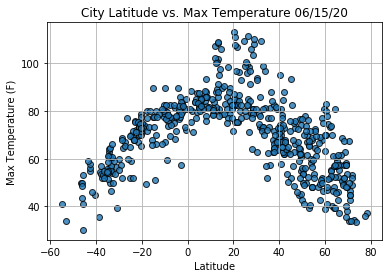

In [28]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_maxt.png")

# Show plot.
plt.show()

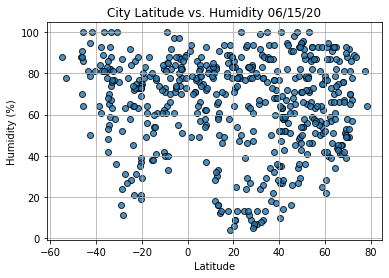

In [29]:
# Build the scatter plot for latitude vs. humidity.

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_hum.png")

# Show plot.
plt.show()

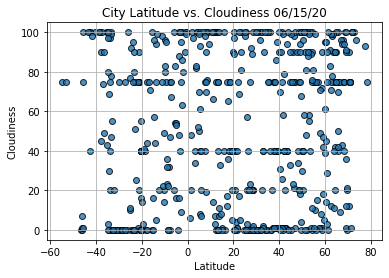

In [30]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_cloud.png")

# Show plot.
plt.show()

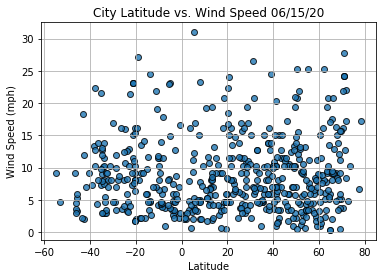

In [31]:
# Build the scatter plot for latitude vs. wind speed.

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_wind.png")

# Show plot.
plt.show()

#### Determine the correlations for the following weather data:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed

In [38]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [39]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

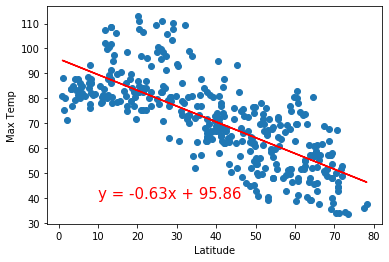

In [45]:
# Linear regression on the Northern Hemisphere

### find out why title is not appearing

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature", 'Max Temp',(10,40))

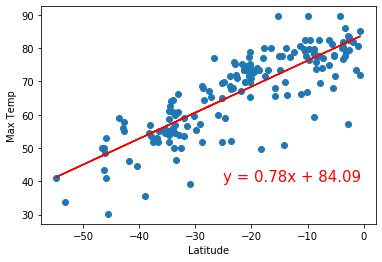

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature", 'Max Temp',(-25,40))


The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.6 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

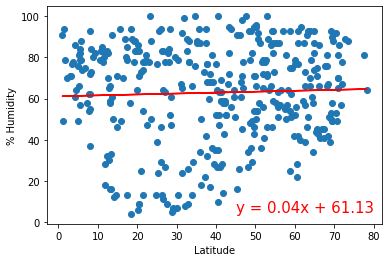

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# title = "Linear Regression on the Northern Hemisphere \n for % Humidity"
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n for % Humidity", '% Humidity',(45,5))

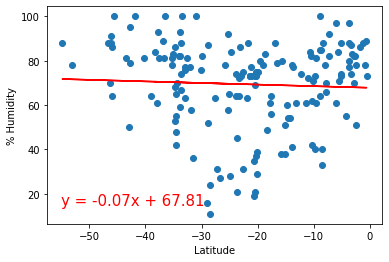

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# title = "Linear Regression on the Northern Hemisphere \n for % Humidity"
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n for % Humidity", '% Humidity',(-55,15))

The correlation between the latitude and percent humidity is very low because the r-value is around 0.04 for the Northern and less than -0.07 in the Southern Hemisphere for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots. 

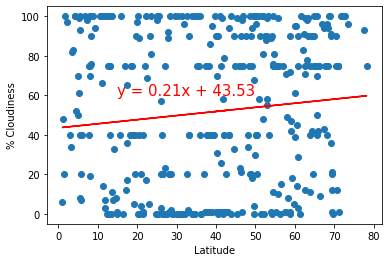

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(15,60))


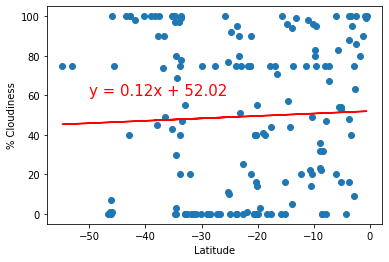

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

The correlation between the latitude and percent cloudiness is very low because the r-value is less than .25 for the Northern Hemisphere and less than .15 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

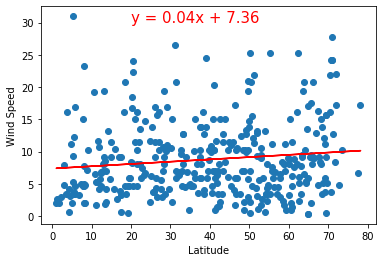

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(20,30))

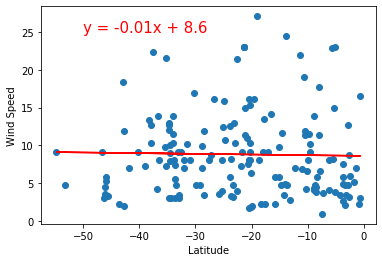

In [86]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,25))

The correlation between the latitude and wind speed is very low because the r-value is less  than 0.05 for the Northern Hemisphere and less than –0.2 for the Southern Hemisphere for the plots shown here . This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 

#### Create a series of heatmaps using the Google Maps and Places API that showcases the following:
    - Latitude and temperature
    - Latitude and humidity
    - Latitude and cloudiness
    - Latitude and wind speed

# Visualize Travel Data
#### Create a heatmap with pop-up markers that can display information on specific cities based on a customer’s travel preferences. 


#### Complete these steps:
    - Filter the Pandas DataFrame based on user inputs for a minimum and maximum temperature.
    - Create a heatmap for the new DataFrame.
    - Find a hotel from the cities’ coordinates using Google’s Maps and Places API, and Search Nearby feature.
    - Store the name of the first hotel in the DataFrame.
    - Add pop-up markers to the heatmap that display information about the city, current maximum temperature, and a hotel in the city.